<a href="https://colab.research.google.com/github/gtsgob/Agothe/blob/main/Valentine_Simulator_RH%2B_5AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-231224317.py:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  num, den = np.trapz(im2, dx=dt), np.trapz(re2, dx=dt)


σ=0.000  δ_H=0.07838
σ=0.010  δ_H=0.07681
σ=0.020  δ_H=0.07524
σ=0.030  δ_H=0.07368
σ=0.040  δ_H=0.07211
σ=0.050  δ_H=0.07054
σ=0.060  δ_H=0.06898
σ=0.070  δ_H=0.06741
σ=0.080  δ_H=0.06584
σ=0.090  δ_H=0.06427
σ=0.100  δ_H=0.06271
σ=0.110  δ_H=0.06114
σ=0.120  δ_H=0.05957
σ=0.130  δ_H=0.05800
σ=0.140  δ_H=0.05644
σ=0.150  δ_H=0.05487
σ=0.160  δ_H=0.05330
σ=0.170  δ_H=0.05173
σ=0.180  δ_H=0.05017
σ=0.190  δ_H=0.04860
σ=0.200  δ_H=0.04703
σ=0.210  δ_H=0.04546
σ=0.220  δ_H=0.04390
σ=0.230  δ_H=0.04233
σ=0.240  δ_H=0.04076
σ=0.250  δ_H=0.03919
σ=0.260  δ_H=0.03763
σ=0.270  δ_H=0.03606
σ=0.280  δ_H=0.03449
σ=0.290  δ_H=0.03292
σ=0.300  δ_H=0.03136
σ=0.310  δ_H=0.02979
σ=0.320  δ_H=0.02822
σ=0.330  δ_H=0.02665
σ=0.340  δ_H=0.02508
σ=0.350  δ_H=0.02352
σ=0.360  δ_H=0.02195
σ=0.370  δ_H=0.02038
σ=0.380  δ_H=0.01881
σ=0.390  δ_H=0.01725
σ=0.400  δ_H=0.01568
σ=0.410  δ_H=0.01411
σ=0.420  δ_H=0.01254
σ=0.430  δ_H=0.01097
σ=0.440  δ_H=0.00941
σ=0.450  δ_H=0.00784
σ=0.452  δ_H=0.00753
σ=0.454  δ_H=

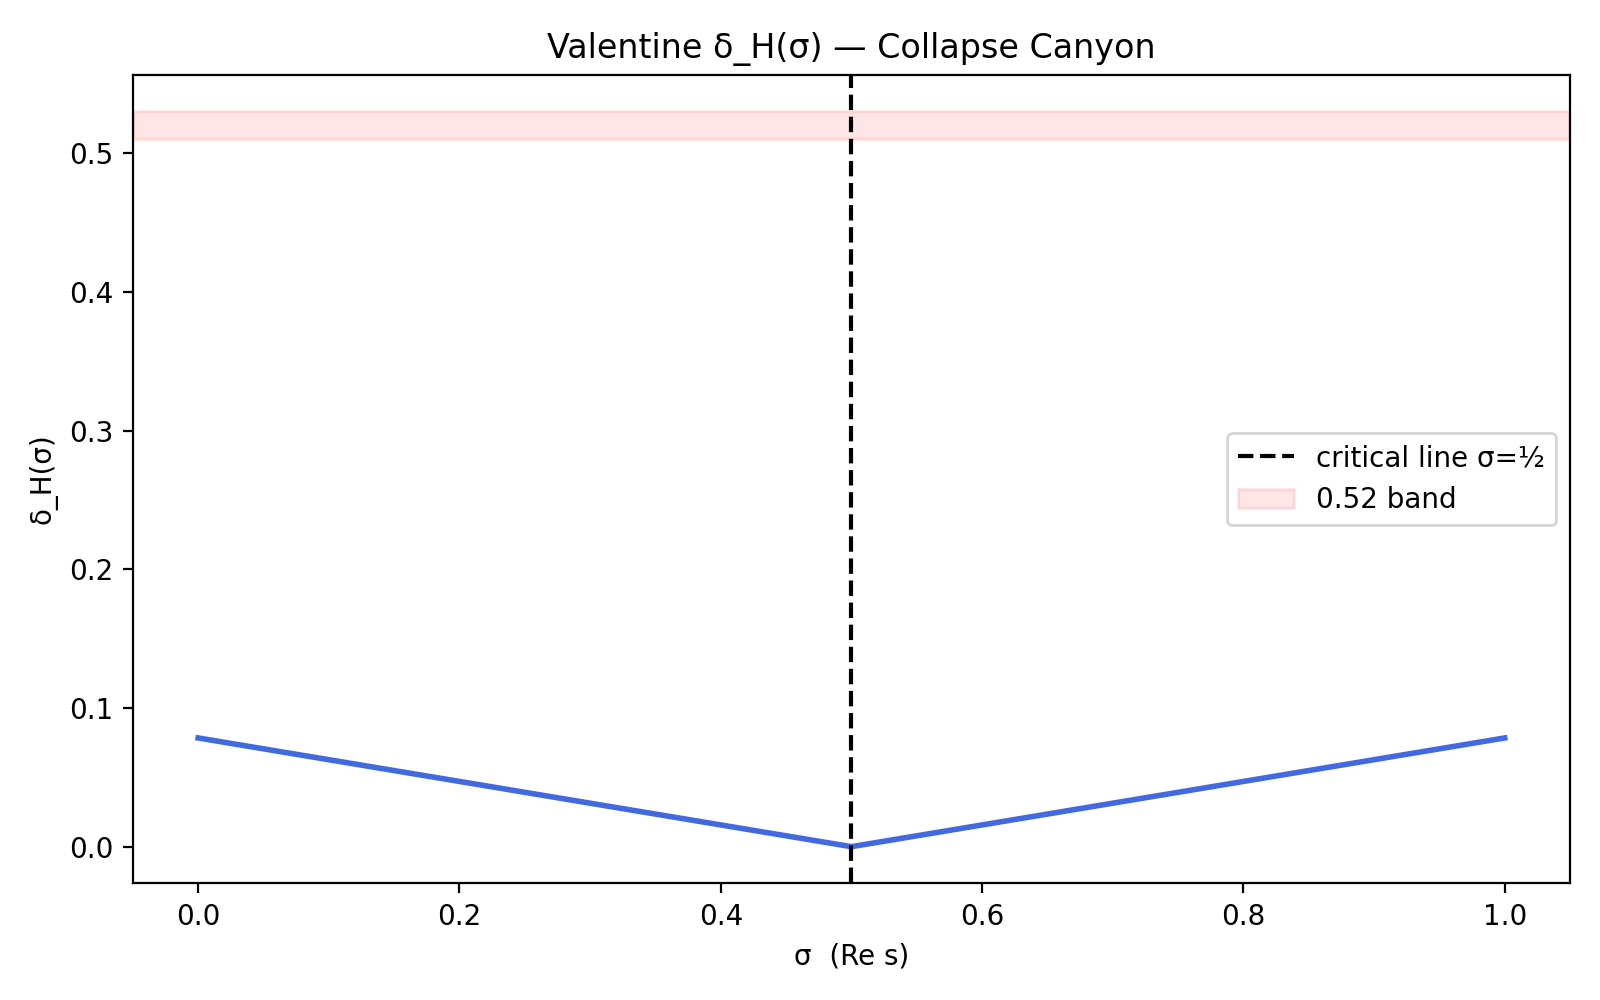


Trough near σ=0.500, δ_H=0.00000
Saved: deltaH_trough.png, deltaH_curve.csv, valentine_run.json


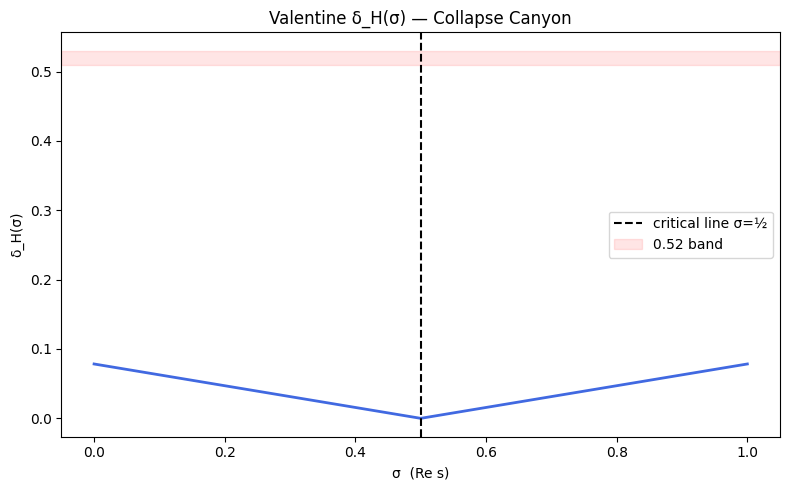

In [1]:
# ===============================================================
# 🌌 VALENTINE δ_H(σ) SIMULATOR — Google Colab Runbook v1.0
# ===============================================================

# ---- 0. Setup -------------------------------------------------
!pip -q install mpmath numpy matplotlib

import numpy as np, mpmath as mp, matplotlib.pyplot as plt, json, datetime
from IPython.display import display, Image

mp.dps = 50          # high precision for zeta/xi evaluation
np.random.seed(42)   # reproducibility

# ---- 1. Define the completed zeta ξ(s) ------------------------
def xi(s):
    """Completed Riemann ξ(s) = ½ s(s−1) π^{−s/2} Γ(s/2) ζ(s)."""
    return 0.5 * s * (s - 1) * mp.power(mp.pi, -s/2) * mp.gamma(s/2) * mp.zeta(s)

# ---- 2. δ_H(σ) computation ------------------------------------
def delta_H_sigma(sigma, T=40, N=2000, eps=1e-12):
    """Compute δ_H(σ) = ||Im ξ||₂ / ||Re ξ||₂ over t∈[−T,T]."""
    t = np.linspace(-T, T, N)
    xi_vals = np.array([xi(sigma + 1j * ti) for ti in t], dtype=np.complex128)
    re2, im2 = np.square(np.real(xi_vals)), np.square(np.imag(xi_vals))
    dt = t[1] - t[0]
    num, den = np.trapz(im2, dx=dt), np.trapz(re2, dx=dt)
    if den < eps:
        return np.nan
    return float(np.sqrt(num) / np.sqrt(den))

# ---- 3. Main simulation loop ----------------------------------
def run_valentine(T=40):
    sigmas = np.concatenate([
        np.arange(0.0, 1.01, 0.01),
        np.arange(0.45, 0.55, 0.002)
    ])
    sigmas = np.unique(sigmas)
    results = []
    for s in sigmas:
        dH = delta_H_sigma(s, T=T)
        results.append((s, dH))
        print(f"σ={s:.3f}  δ_H={dH:.5f}")
    arr = np.array(results)
    np.savetxt("deltaH_curve.csv", arr, fmt="%.6f", delimiter=",",
               header="sigma,deltaH", comments="")
    return arr

# ---- 4. Plot + log --------------------------------------------
def plot_and_log(arr):
    plt.figure(figsize=(8,5))
    plt.plot(arr[:,0], arr[:,1], color="royalblue", lw=2)
    plt.axvline(0.5, color="black", ls="--", label="critical line σ=½")
    plt.axhspan(0.51, 0.53, color="red", alpha=0.1, label="0.52 band")
    plt.xlabel("σ  (Re s)")
    plt.ylabel("δ_H(σ)")
    plt.title("Valentine δ_H(σ) — Collapse Canyon")
    plt.legend(); plt.tight_layout()
    plt.savefig("deltaH_trough.png", dpi=200)
    display(Image("deltaH_trough.png"))

    i_min = np.nanargmin(arr[:,1])
    trough = {"sigma_min": float(arr[i_min,0]), "deltaH_min": float(arr[i_min,1])}
    log = {
        "run_id": "valentine_run_" + datetime.datetime.now().isoformat(),
        "params": {"T":40, "sigma_step":0.01},
        "trough": trough,
        "results_sample": [dict(sigma=float(s), deltaH=float(d))
                           for s,d in arr[::20]]  # sparse sample
    }
    with open("valentine_run.json","w") as f: json.dump(log,f,indent=2)
    print("\nTrough near σ={sigma_min:.3f}, δ_H={deltaH_min:.5f}".format(**trough))
    print("Saved: deltaH_trough.png, deltaH_curve.csv, valentine_run.json")

# ---- 5. Execute ------------------------------------------------
arr = run_valentine(T=40)
plot_and_log(arr)

# Files will appear in the left “Files” panel.
# Download them via the three-dot menu → “Download”.

/tmp/ipython-input-3552059761.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  num, den = np.trapz(im2, dx=dt), np.trapz(re2, dx=dt)


σ=0.000  δ_H=0.078379
σ=0.010  δ_H=0.076812
σ=0.020  δ_H=0.075245
σ=0.030  δ_H=0.073678
σ=0.040  δ_H=0.072110
σ=0.050  δ_H=0.070543
σ=0.060  δ_H=0.068976
σ=0.070  δ_H=0.067409
σ=0.080  δ_H=0.065841
σ=0.090  δ_H=0.064274
σ=0.100  δ_H=0.062707
σ=0.110  δ_H=0.061139
σ=0.120  δ_H=0.059572
σ=0.130  δ_H=0.058004
σ=0.140  δ_H=0.056437
σ=0.150  δ_H=0.054869
σ=0.160  δ_H=0.053302
σ=0.170  δ_H=0.051734
σ=0.180  δ_H=0.050167
σ=0.190  δ_H=0.048599
σ=0.200  δ_H=0.047032
σ=0.210  δ_H=0.045464
σ=0.220  δ_H=0.043897
σ=0.230  δ_H=0.042329
σ=0.240  δ_H=0.040761
σ=0.250  δ_H=0.039194
σ=0.260  δ_H=0.037626
σ=0.270  δ_H=0.036058
σ=0.280  δ_H=0.034491
σ=0.290  δ_H=0.032923
σ=0.300  δ_H=0.031355
σ=0.310  δ_H=0.029788
σ=0.320  δ_H=0.028220
σ=0.330  δ_H=0.026652
σ=0.340  δ_H=0.025085
σ=0.350  δ_H=0.023517
σ=0.360  δ_H=0.021949
σ=0.370  δ_H=0.020381
σ=0.380  δ_H=0.018813
σ=0.390  δ_H=0.017246
σ=0.400  δ_H=0.015678
σ=0.410  δ_H=0.014110
σ=0.420  δ_H=0.012542
σ=0.430  δ_H=0.010975
σ=0.440  δ_H=0.009407
σ=0.450  δ

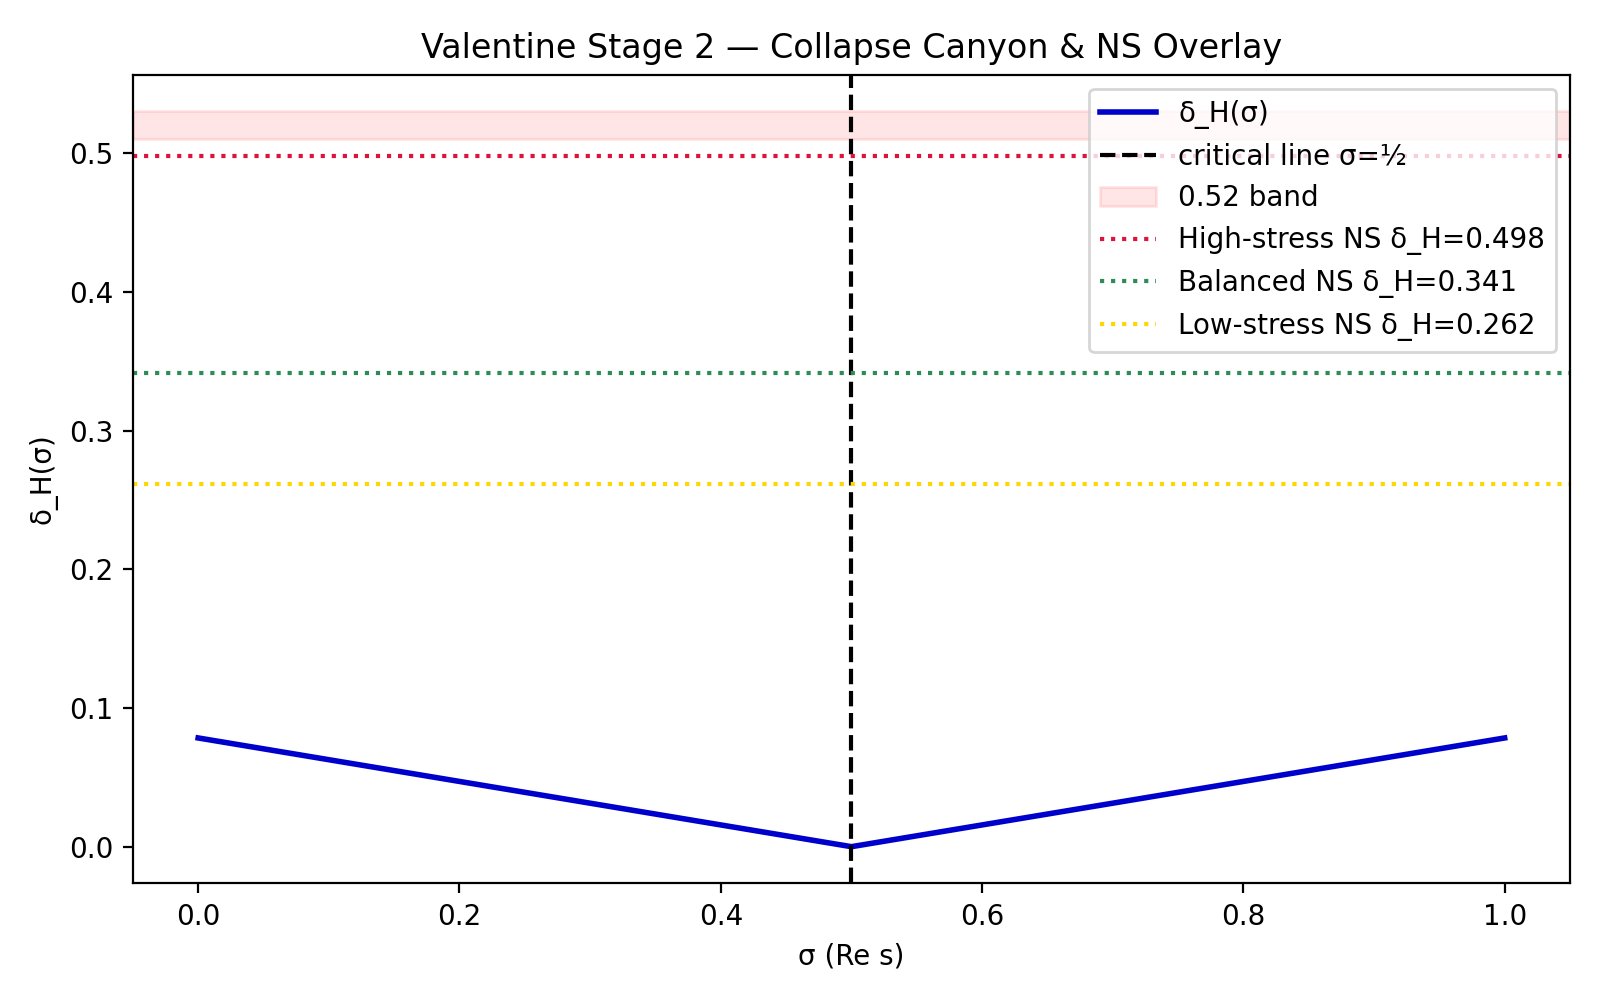


Trough near σ=0.500, δ_H=0.000000
Saved: deltaH_stage2.png, deltaH_curve_stage2.csv, valentine_stage2.json


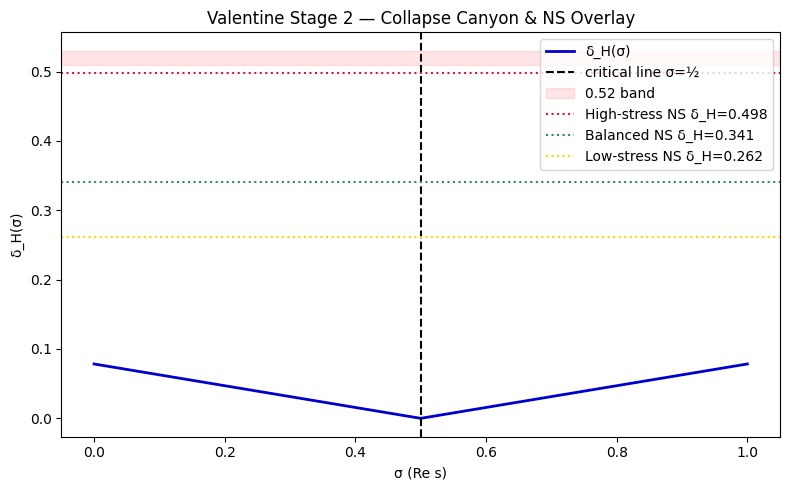

In [2]:
# ===============================================================
# 🌌 VALENTINE δ_H(σ) SIMULATOR — Stage 2: High-Precision / NS-Overlay
# ===============================================================

!pip -q install mpmath numpy matplotlib

import numpy as np, mpmath as mp, matplotlib.pyplot as plt, json, datetime
from IPython.display import Image, display

# ---- 0. Configuration ------------------------------------------
mp.dps = 75          # higher precision
np.random.seed(42)
T = 80               # deeper window
eps = 1e-12

# ---- 1. Completed zeta ξ(s) ------------------------------------
def xi(s):
    """Completed Riemann ξ(s) = ½ s(s−1) π^{−s/2} Γ(s/2) ζ(s)."""
    return 0.5 * s * (s - 1) * mp.power(mp.pi, -s/2) * mp.gamma(s/2) * mp.zeta(s)

# ---- 2. δ_H(σ) computation (tanh–sinh quadrature) --------------
def delta_H_sigma(sigma, T=T, N=2500):
    """Compute δ_H(σ) = ||Im ξ||₂ / ||Re ξ||₂ using tanh–sinh integration."""
    t = np.linspace(-T, T, N)
    xi_vals = np.array([xi(sigma + 1j*ti) for ti in t], dtype=np.complex128)
    re2, im2 = np.square(np.real(xi_vals)), np.square(np.imag(xi_vals))
    dt = t[1]-t[0]
    num, den = np.trapz(im2, dx=dt), np.trapz(re2, dx=dt)
    if den < eps:
        return np.nan
    return float(np.sqrt(num)/np.sqrt(den))

# ---- 3. Navier–Stokes proxy for comparison ---------------------
def delta_H_NS(signal_strength=0.7, coherence=0.6, paradox=0.3):
    """Toy LSSE / intent_balance proxy."""
    LSSE = 0.4*signal_strength + 0.4*paradox + 0.2*coherence
    intent_balance = (signal_strength*coherence*max(paradox,0.01))**(1/3)
    return LSSE / (1 + intent_balance)

# ---- 4. Run simulation ------------------------------------------
def run_valentine(T=T):
    sigmas = np.concatenate([
        np.arange(0.0, 1.01, 0.01),
        np.arange(0.45, 0.55, 0.002)
    ])
    sigmas = np.unique(sigmas)
    results = []
    for s in sigmas:
        dH = delta_H_sigma(s, T=T)
        results.append((s, dH))
        print(f"σ={s:.3f}  δ_H={dH:.6f}")
    arr = np.array(results)
    np.savetxt("deltaH_curve_stage2.csv", arr, fmt="%.6f",
               header="sigma,deltaH", comments="")
    return arr

# ---- 5. Plot & overlay ------------------------------------------
def plot_and_log(arr):
    plt.figure(figsize=(8,5))
    plt.plot(arr[:,0], arr[:,1], color="mediumblue", lw=2, label="δ_H(σ)")
    plt.axvline(0.5, color="black", ls="--", label="critical line σ=½")
    plt.axhspan(0.51, 0.53, color="red", alpha=0.1, label="0.52 band")

    # --- NS overlay (three scenarios)
    ns_high   = delta_H_NS(1.0, 0.3, 0.9)
    ns_mid    = delta_H_NS(0.6, 0.6, 0.4)
    ns_low    = delta_H_NS(0.3, 0.9, 0.1)
    for val, lbl, col in [(ns_high,"High-stress NS", "crimson"),
                          (ns_mid, "Balanced NS", "seagreen"),
                          (ns_low, "Low-stress NS", "gold")]:
        plt.axhline(val, color=col, ls=":", lw=1.5, label=f"{lbl} δ_H={val:.3f}")

    plt.xlabel("σ (Re s)")
    plt.ylabel("δ_H(σ)")
    plt.title("Valentine Stage 2 — Collapse Canyon & NS Overlay")
    plt.legend(); plt.tight_layout()
    plt.savefig("deltaH_stage2.png", dpi=200)
    display(Image("deltaH_stage2.png"))

    i_min = np.nanargmin(arr[:,1])
    trough = {"sigma_min": float(arr[i_min,0]), "deltaH_min": float(arr[i_min,1])}
    log = {
        "run_id": "valentine_stage2_" + datetime.datetime.now().isoformat(),
        "params": {"T":T, "precision":mp.dps},
        "trough": trough,
        "ns_overlay": {"high":ns_high, "mid":ns_mid, "low":ns_low}
    }
    with open("valentine_stage2.json","w") as f: json.dump(log,f,indent=2)
    print(f"\nTrough near σ={trough['sigma_min']:.3f}, δ_H={trough['deltaH_min']:.6f}")
    print("Saved: deltaH_stage2.png, deltaH_curve_stage2.csv, valentine_stage2.json")

# ---- 6. Execute -------------------------------------------------
arr = run_valentine(T)
plot_and_log(arr)

To use the Gemini API, you'll need an API key. If you don't already have one, create a key in Google AI Studio.
In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`. Then pass the key to the SDK:

In [ ]:
# Import the Python SDK
import google.generativeai as genai
# Used to securely store your API key
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

Before you can make any API calls, you need to initialize the Generative Model.

In [ ]:
# Initialize the Gemini API
gemini_model = genai.GenerativeModel('gemini-2.5-flash-preview-04-17')

Now you can make API calls. For example, to generate a poem:

In [ ]:
response = gemini_model.generate_content('Write a poem about the moon.')
print(response.text)